In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# read in data_label_list
def read_text_file_to_dataframe(file_path):
    try:
        df = pd.read_csv(file_path, header=None, sep='\t')
        return df
    except Exception as e:
        print(f"Error occurred while reading the text file: {e}")
        return None

In [3]:
def show_ratio(x, labels):
    total = sum(x)

    for x_i, lab_i in zip(x, labels):
         print(f'{lab_i} len: {round(x_i/6000, 2)}min = {round(x_i/total*100, 4)}%')

    plt.pie(x, labels=labels)
    plt.legend()
    plt.show()

In [1]:
total_length = [0.0]*2
more_than_3s_length = [0.0]*2
more_than_5s_length = [0.0]*2
more_than_10s_length = [0.0]*2

for dir in os.listdir("data/seame/"):
    file_path = "data/seame/" + dir + "/data_label_list.txt"
    data_frame = read_text_file_to_dataframe(file_path)

    # show label distribution by time
    zh_rows = data_frame.loc[data_frame.iloc[1] == 'ZH']
    en_rows = data_frame.loc[data_frame[1] == 'EN']

    total_length[0] += sum(zh_rows[2])
    total_length[1] += sum(en_rows[2])

    zh_3s_rows = zh_rows[zh_rows[2] > 3000]
    en_3s_rows = en_rows[en_rows[2] > 3000]
    more_than_3s_length[0] += sum(zh_3s_rows[2])
    more_than_3s_length[1] += sum(en_3s_rows[2])

    zh_5s_rows = zh_rows[zh_rows[2] > 5000]
    en_5s_rows = en_rows[en_rows[2] > 5000]
    more_than_5s_length[0] += sum(zh_5s_rows[2])
    more_than_5s_length[1] += sum(en_5s_rows[2])


    zh_10s_rows = zh_rows[zh_rows[2] > 10000]
    en_10s_rows = en_rows[en_rows[2] > 10000]
    more_than_10s_length[0] += sum(zh_10s_rows[2])
    more_than_10s_length[1] += sum(en_10s_rows[2])

NameError: name 'os' is not defined

ZH len: 7481.67min = 58.2402%
EN len: 5364.57min = 41.7598%


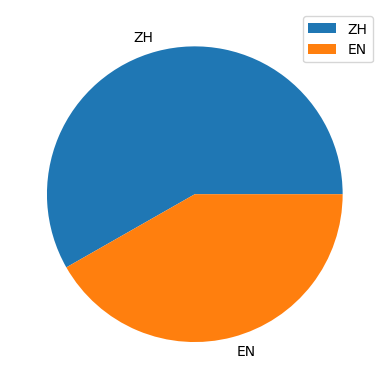

In [ ]:
# distribution of all lengths
show_ratio(total_length, ['ZH', 'EN'])

ZH len: 5229.47min = 59.1149%
EN len: 3616.82min = 40.8851%


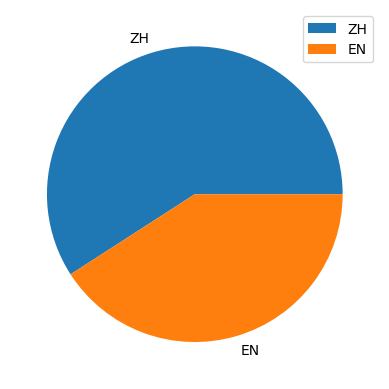

In [ ]:
# distribution of >3s segs
show_ratio(more_than_3s_length, ['ZH', 'EN'])

ZH len: 3020.59min = 56.6104%
EN len: 2315.16min = 43.3896%


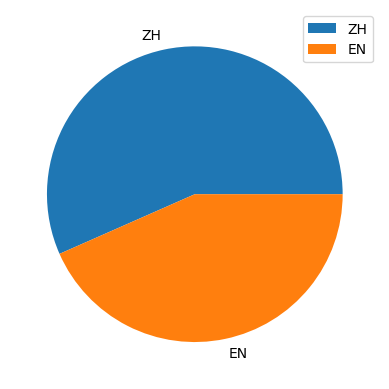

In [ ]:
# distribution of >5s segs
show_ratio(more_than_5s_length, ['ZH', 'EN'])

ZH len: 595.37min = 43.0233%
EN len: 788.46min = 56.9767%


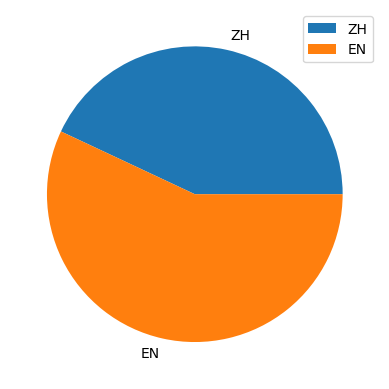

In [ ]:
# distribution of >10s segs
show_ratio(more_than_10s_length, ['ZH', 'EN'])

In [ ]:
ratio_en = [more_than_3s_length[1], more_than_5s_length[1]]
ratio_zh = []
